# TP 3 - Métodos No Paramétricos

## Ejercicio 1

* _Para diversos $n$, muestrear $n$ veces de una distribución normal estándar y estimar dicha pdf en $0$, $1$ y $2$. Realizar $N$ repeticiones, y calificar los resultados tomando media y varianza. Utilizar en primer lugar 'Ventanas de Parzen' y en segundo '$k_n$ Vecino más Cercano'._

## Comentarios

Como función ventana también utilizo una normal estándar.

In [99]:
clc;

In [130]:
function run_experiment(x, mode, NSAMPLES, NREPS)
    means = [];
    vars = [];
    for n = NSAMPLES
      estimations = [];
      
      for _ = 1:NREPS
        % Sampling
        Dt = stdnormal_rnd([1 n]);
        % Estimation
        if mode
          % Parzen Windows
          h_n = 1/log(n);
          estimate = mean(stdnormal_pdf((x - Dt) / h_n) / h_n);
        else
          % Closest Neighbours
          k_n = min(n, 10 * ceil(log(n)));
          set = 0;
          min_radius = 0;
          for sample = Dt
            radius = abs(sample - x);
            count = sum(abs(Dt - x) <= radius + 1e-5); 
            if count >= k_n
              if !set || radius < min_radius
                min_radius = radius;
                set = 1;
              end
            end
          end
          estimate = k_n / (n * (min_radius * 2));
        end
        estimations = [estimations estimate];
      end
      
      means = [means mean(estimations)];
      vars = [vars var(estimations)];
    end

    % Plot
    hold on;
    plot(1:length(NSAMPLES), means, "marker", "d");
    scatter(1:length(NSAMPLES), means - vars, "r");
    scatter(1:length(NSAMPLES), means + vars, "r");
    plot([1 length(NSAMPLES)], [stdnormal_pdf(x) stdnormal_pdf(x)], "linestyle", "--", "color", "g");
    %set(gca, 'xtick', 1:length(NSAMPLES));
    %set(gca, 'xticklabel', num2str(NSAMPLES));
endfunction

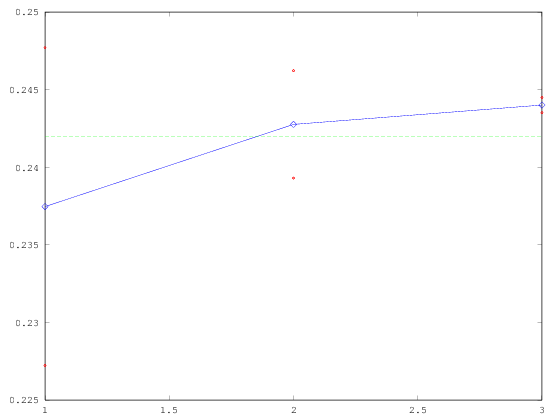

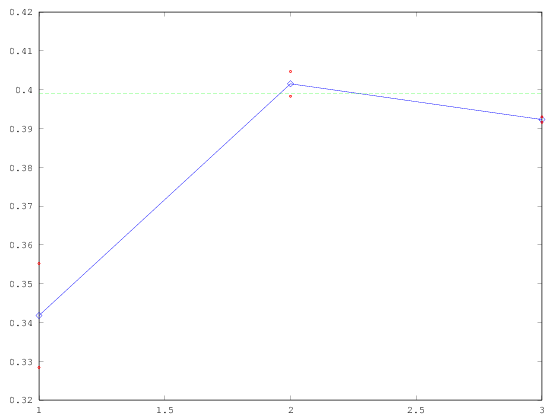

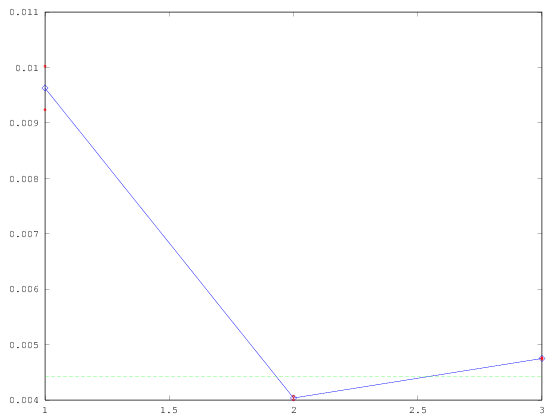

Time: 3.956141948699951 seconds.



In [135]:
%%time

NREPS = 100; % 1000
NSAMPLES = [10 100 1000]; %10000

% PARZEN
figure(1), run_experiment(0, 1, NSAMPLES, NREPS)
figure(2), run_experiment(1, 1, NSAMPLES, NREPS)
figure(3), run_experiment(3, 1, NSAMPLES, NREPS)

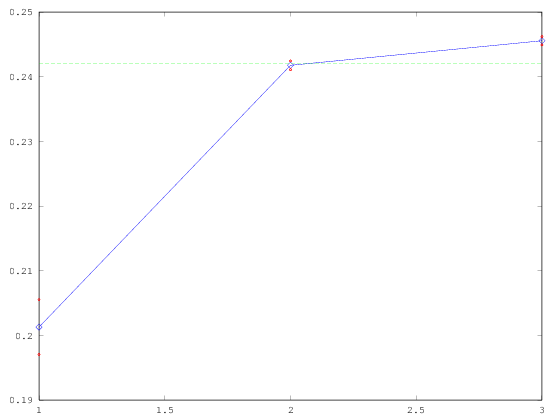

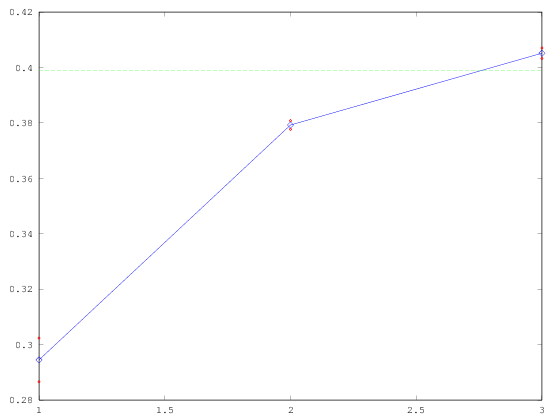

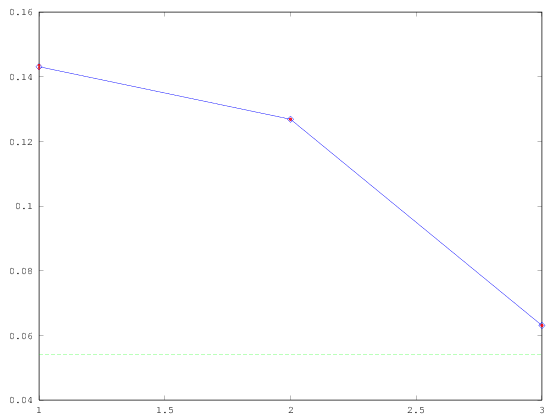

Time: 28.055562019348145 seconds.



In [134]:
%%time

NREPS = 100;
NSAMPLES = [10 100 1000];

% VECINOS
figure(1), run_experiment(0, 0, NSAMPLES, NREPS)
figure(2), run_experiment(1, 0, NSAMPLES, NREPS)
figure(3), run_experiment(2, 0, NSAMPLES, NREPS)